Kami dari kelompok 2-PYTHN-KS18 yang beranggotakan:
1. Annisa Aprilia
2. Rika Anggraini
3. Rendhi Andrianto

## 1. Introduce

Data ini merupakan kumpulan data hujan harian selama 10 tahun di Australia, pada data ini kita akan memprediksi kemungkinan turunnya hujan. Untuk mengetahui kemungkinan turunnya hujan, beberapa hal yang harus diperhatikan antara lain evaporasi,kelembapan, temperatur, angin, dan suhu. Pada database ini kolom yang tersedia sangat lengkap dalam memprediksi curah hujan yaitu sebagai berikut :
1. Date - tanggal hari itu
2. Location - lokasi, nama kota di Australia
3. MinTemp - temperatur terendah hari itu dalam celcius
4. MaxTemp - temperatur tertinggi hari itu dalam celcius
5. Rainfall - jumlah curah hujan hari itu dalam mm
6. Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam
sebelum jam 9 pagi hari itu
7. Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
8. WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum
jam 12 malam hari itu
9. WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24
jam sebelum jam 12 malam hari itu
10. WindDir9am - arah angin jam 9 pagi
11. WindDir3pm - arah angin jam 3 sore
12. WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. Humidity9am - humiditas jam 9 pagi dalam persen
15. Humidity3pm - humiditas jam 3 sore dalam persen
16. Pressure9am - tekanan udara jam 9 pagi dalam hpa
17. Pressure3pm - tekanan udara jam 3 sore dalam hpa
18. Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam
oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0,
langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. Cloud3pm - persentase langit yang tertutup awan jam 3 sore
20. Temp9am - temperatur jam 9 pagi dalam celcius
21. Temp3pm - temperatur jam 3 sore dalam celcius
22. RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi
melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. RainTomorrow - variable yang mau di prediksi

Dalam hal konteks ini kita akan memprediksi apakah besok akan turun hujan atau tidak di beberapa wilayah Australia dengan menggunakan konsep Logistic Regression dan SVM kemudian kolom RainTomorrow adalah variabel target untuk diprediksi. kita menggunakan LogisticRegression dikarenakan yang diprediksi hanya memiliki 2 kemungkinan yaitu iya/tidak-nya besok akan turun hujan, dan menggunakan SVM untuk mengklasifikasikan dan regresi 2 kemungkinan tersebut hingga mampu menghasilkan model klasifikasi yang baik meskipun dilatih dengan himpunan data yang relatif sedikit.

## 2. IMPORT PUSTAKA

In [1]:
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats.mstats import winsorize
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, accuracy_score, confusion_matrix

from sklearn import metrics
import pickle

## 3. DATA LOADING

In [2]:
# memasukkan data hujan di Australia

df = pd.read_csv('weatherAUS.csv')

In [3]:
# mengetahui jumlah baris dan kolom dari dataset

df.shape

(145460, 23)

In [4]:
# mengetahui tipe data dari kolom yang ada pada dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
# mengetahui deskripsi atau penjelasan dari tiap kolom dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


Pada tahap loading data kita terlebih dahulu memanggil data, mencari tahu info dari data, dan mengetahui nilai statistik deskriptif dari data tersebut. Untuk syntax df.describe().T berfungsi mengubah/ mengtranspose baris menjadi kolom. 

## 4. DATA CLEANING

### 4.1 Mengetahui Data Unique

In [6]:
pd.DataFrame(df.nunique())

,0
Date,3436
Location,49
MinTemp,389
MaxTemp,505
Rainfall,681
Evaporation,358
Sunshine,145
WindGustDir,16
WindGustSpeed,67
WindDir9am,16


pada tahap ini kita dapat mengetahui nilai unique dari data weather di australia. istilah unique" atau "unik" merujuk pada nilai-nilai yang bersifat unik atau tidak memiliki duplikat dalam suatu dataset, atau dengan kata lain unique adalah mengidentifikasi dan penghapusan nilai-nilai yang sama atau duplikat dari suatu kolom atau dataset

### 4.2 Menghapus Missing Value

In [7]:
pd.DataFrame(df.isna().sum())

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [8]:
df.dropna(inplace=True)
df.reset_index(drop=True)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
1,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
2,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
3,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
4,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
56416,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
56417,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
56418,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


In [9]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [10]:
# Periksa dan ubah nilai missing menjadi median (untuk kolom numerik)
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Menampilkan hasil perubahan missing value ke median (untuk kolom numerik)
missing_value = df[numerical_columns].isna().sum().reset_index()
missing_value.columns = ['Column name', 'Missing Value']
missing_value

,Column name,Missing Value
0,MinTemp,0
1,MaxTemp,0
2,Rainfall,0
3,Evaporation,0
4,Sunshine,0
5,WindGustSpeed,0
6,WindSpeed9am,0
7,WindSpeed3pm,0
8,Humidity9am,0
9,Humidity3pm,0


In [11]:
# Periksa dan ubah nilai missing menjadi modus (untuk kolom kategorikal)
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Menampilkan hasil perubahan missing value ke median (untuk kolom numerik)
missing_value = df[categorical_columns].isna().sum().reset_index()
missing_value.columns = ['Column name', 'Missing Value']
missing_value

,Column name,Missing Value
0,Date,0
1,Location,0
2,WindGustDir,0
3,WindDir9am,0
4,WindDir3pm,0
5,RainToday,0
6,RainTomorrow,0


In [12]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Lakukan Label Encoding pada kolom RainTomorrow
df['RainTomorrow_encoded'] = label_encoder.fit_transform(df['RainTomorrow'])

# Tampilkan beberapa baris setelah encoding
print("\nBeberapa baris setelah encoding:")
print(df[['RainTomorrow', 'RainTomorrow_encoded']].head())


Beberapa baris setelah encoding:
     RainTomorrow  RainTomorrow_encoded
6049           No                     0
6050           No                     0
6052           No                     0
6053           No                     0
6054           No                     0


In [13]:
# Menampilkan baris yang memiliki nilai RainTomorrow_encoded == 1

rows_rain_tomorrow_1 = df[df['RainTomorrow_encoded'] == 1]
print(rows_rain_tomorrow_1[['RainTomorrow', 'RainTomorrow_encoded']])

       RainTomorrow  RainTomorrow_encoded
6067            Yes                     1
6070            Yes                     1
6071            Yes                     1
6082            Yes                     1
6092            Yes                     1
...             ...                   ...
142227          Yes                     1
142228          Yes                     1
142233          Yes                     1
142236          Yes                     1
142244          Yes                     1

[12427 rows x 2 columns]


dalam tahap mengatasi missing value ini pertama kami menghapus nilai yang missing karena jumlah nilai yang missing dalam skala besar sehingga akan sukar untuk mengatasinya. setelah menghapus nilai missing kami mengubahnya dengan nilai modus dan median, kami tidak  menggunakan mean dikarenakan mean dapat mempengaruhi adanya  outlier, jadi lebih relevan menggunakan median. 

### 4.3 Menghapus kolom

In [14]:
df = df.drop(columns=['Date', 'Location', 'WindDir9am', 'WindDir3pm'])

mengapa kolom di atas didrop karena target yang ingin di prediksi adalah raintomorrow maka kolom yang di drop tidak terlalu esensial untuk di analisis, juga kolom tersebut  tidak memiliki keterurutan dan bukan angka nol sejati

### 4.4 Mencari Outlier

In [15]:
# Menghitung Q1, Q3, dan IQR
# Menghitung Q1, Q3, dan IQR
q1 = df[numerical_columns].quantile(0.25)
q3 = df[numerical_columns].quantile(0.75)
iqr = q3 - q1
# Mengidentifikasi outlier
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)]

# Menampilkan hasil
print("Kuartil Pertama (Q1):", q1)
print("\nKuartil Ketiga (Q3):", q3)
print("\nInterquartile Range (IQR):", iqr)


Kuartil Pertama (Q1): MinTemp             8.6
MaxTemp            18.7
Rainfall            0.0
Evaporation         2.8
Sunshine            5.0
WindGustSpeed      31.0
WindSpeed9am        9.0
WindSpeed3pm       13.0
Humidity9am        55.0
Humidity3pm        35.0
Pressure9am      1012.7
Pressure3pm      1010.1
Cloud9am            1.0
Cloud3pm            2.0
Temp9am            13.1
Temp3pm            17.4
Name: 0.25, dtype: float64

Kuartil Ketiga (Q3): MinTemp            18.4
MaxTemp            29.7
Rainfall            0.6
Evaporation         7.4
Sunshine           10.7
WindGustSpeed      48.0
WindSpeed9am       20.0
WindSpeed3pm       26.0
Humidity9am        79.0
Humidity3pm        63.0
Pressure9am      1021.8
Pressure3pm      1019.4
Cloud9am            7.0
Cloud3pm            7.0
Temp9am            23.3
Temp3pm            27.9
Name: 0.75, dtype: float64

Interquartile Range (IQR): MinTemp           9.8
MaxTemp          11.0
Rainfall          0.6
Evaporation       4.6
Sunshine          

In [16]:
print("Outliers:")
print(outliers)

Outliers:
        MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
6049        NaN      NaN       NaN          NaN       NaN         NaN   
6050        NaN      NaN       NaN         14.8       NaN         NaN   
6052        NaN      NaN       NaN          NaN       NaN         NaN   
6053        NaN      NaN       NaN          NaN       NaN         NaN   
6054        NaN      NaN       NaN          NaN       NaN         NaN   
...         ...      ...       ...          ...       ...         ...   
142298      NaN      NaN       NaN          NaN       NaN         NaN   
142299      NaN      NaN       NaN          NaN       NaN         NaN   
142300      NaN      NaN       NaN          NaN       NaN         NaN   
142301      NaN      NaN       NaN          NaN       NaN         NaN   
142302      NaN      NaN       NaN          NaN       NaN         NaN   

        WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
6049              NaN           Na

## 5. EKSPLORASI DATA

### 5.1 measure of central tendency : mean

In [17]:
# untuk mengetahui mean dari data tersebut bisa menggunakan syntax .describe()

df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,56420.0,13.464770,6.416689,-6.7,8.6,13.2,18.4,31.4
MaxTemp,56420.0,24.219206,6.970676,4.1,18.7,23.9,29.7,48.1
Rainfall,56420.0,2.130397,7.014822,0.0,0.0,0.0,0.6,206.2
Evaporation,56420.0,5.503135,3.696282,0.0,2.8,5.0,7.4,81.2
Sunshine,56420.0,7.735626,3.758153,0.0,5.0,8.6,10.7,14.5
WindGustSpeed,56420.0,40.877366,13.335232,9.0,31.0,39.0,48.0,124.0
WindSpeed9am,56420.0,15.667228,8.317005,2.0,9.0,15.0,20.0,67.0
WindSpeed3pm,56420.0,19.786778,8.510180,2.0,13.0,19.0,26.0,76.0
Humidity9am,56420.0,65.874123,18.513289,0.0,55.0,67.0,79.0,100.0
Humidity3pm,56420.0,49.601985,20.197040,0.0,35.0,50.0,63.0,100.0


### 5.2 Mesuare of central tendency : median

In [18]:
print('nilai medianya sebagai berikut :')
df[numerical_columns].median()

nilai medianya sebagai berikut :


MinTemp            13.2
MaxTemp            23.9
Rainfall            0.0
Evaporation         5.0
Sunshine            8.6
WindGustSpeed      39.0
WindSpeed9am       15.0
WindSpeed3pm       19.0
Humidity9am        67.0
Humidity3pm        50.0
Pressure9am      1017.2
Pressure3pm      1014.7
Cloud9am            5.0
Cloud3pm            5.0
Temp9am            17.8
Temp3pm            22.4
dtype: float64

### 5.3 Measure of central tendency : modus

In [19]:
df[numerical_columns].mode().iloc[0]

MinTemp            13.0
MaxTemp            19.6
Rainfall            0.0
Evaporation         4.0
Sunshine            0.0
WindGustSpeed      35.0
WindSpeed9am       13.0
WindSpeed3pm       17.0
Humidity9am        68.0
Humidity3pm        52.0
Pressure9am      1016.4
Pressure3pm      1013.5
Cloud9am            7.0
Cloud3pm            7.0
Temp9am            16.6
Temp3pm            18.4
Name: 0, dtype: float64

### 5.4 Measure of spread : Range

In [20]:
nilai_max = df[numerical_columns].max()
nilai_max

MinTemp            31.4
MaxTemp            48.1
Rainfall          206.2
Evaporation        81.2
Sunshine           14.5
WindGustSpeed     124.0
WindSpeed9am       67.0
WindSpeed3pm       76.0
Humidity9am       100.0
Humidity3pm       100.0
Pressure9am      1040.4
Pressure3pm      1038.9
Cloud9am            8.0
Cloud3pm            9.0
Temp9am            39.4
Temp3pm            46.1
dtype: float64

In [21]:
nilai_min = df[numerical_columns].min()
nilai_min

MinTemp           -6.7
MaxTemp            4.1
Rainfall           0.0
Evaporation        0.0
Sunshine           0.0
WindGustSpeed      9.0
WindSpeed9am       2.0
WindSpeed3pm       2.0
Humidity9am        0.0
Humidity3pm        0.0
Pressure9am      980.5
Pressure3pm      977.1
Cloud9am           0.0
Cloud3pm           0.0
Temp9am           -0.7
Temp3pm            3.7
dtype: float64

In [22]:
print('nilai rangenya yaitu :')
measure_range = nilai_max - nilai_min
measure_range

nilai rangenya yaitu :


MinTemp           38.1
MaxTemp           44.0
Rainfall         206.2
Evaporation       81.2
Sunshine          14.5
WindGustSpeed    115.0
WindSpeed9am      65.0
WindSpeed3pm      74.0
Humidity9am      100.0
Humidity3pm      100.0
Pressure9am       59.9
Pressure3pm       61.8
Cloud9am           8.0
Cloud3pm           9.0
Temp9am           40.1
Temp3pm           42.4
dtype: float64

### 5.5 Measure of spread : variance

In [23]:
np.var(df[numerical_columns]).reset_index().rename(
    columns={'index': 'column name', 0 : 'variance'})

,column name,variance
0,MinTemp,41.173165
1,MaxTemp,48.589468
2,Rainfall,49.206859
3,Evaporation,13.662260
4,Sunshine,14.123466
5,WindGustSpeed,177.825248
6,WindSpeed9am,69.171344
7,WindSpeed3pm,72.421888
8,Humidity9am,342.735803
9,Humidity3pm,407.913190


### 5.6 Measure of spread : standard deviation

In [24]:
df[numerical_columns].std().reset_index().rename(
    columns={'index': 'column name', 0 : 'Standard Deviation'})

,column name,Standard Deviation
0,MinTemp,6.416689
1,MaxTemp,6.970676
2,Rainfall,7.014822
3,Evaporation,3.696282
4,Sunshine,3.758153
5,WindGustSpeed,13.335232
6,WindSpeed9am,8.317005
7,WindSpeed3pm,8.510180
8,Humidity9am,18.513289
9,Humidity3pm,20.197040


### 5.7 Visualisasi Data

### 5.7.1 Bar Plot

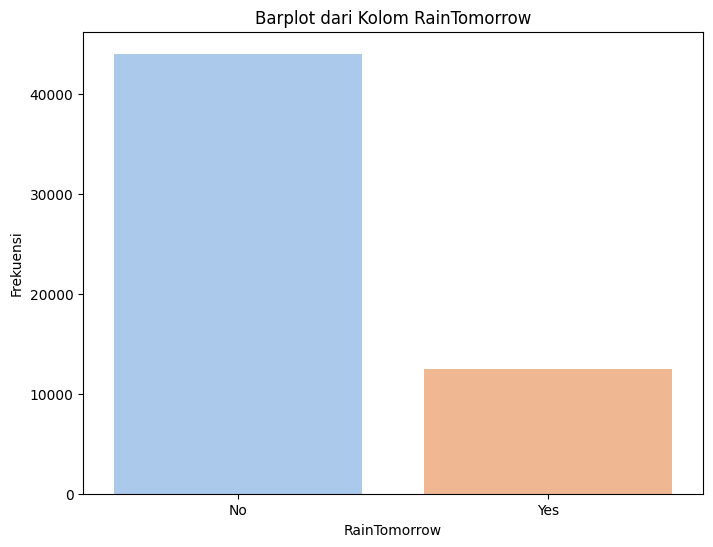

In [25]:
# Pilih kolom yang ingin divisualisasikan
kolom_visualisasi = 'RainTomorrow'

# Hitung frekuensi nilai unik dalam kolom tersebut
count_values = df[kolom_visualisasi].value_counts()

# Visualisasi menggunakan Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=count_values.index, y=count_values.values, palette='pastel')
plt.title(f'Barplot dari Kolom {kolom_visualisasi}')
plt.xlabel(kolom_visualisasi)
plt.ylabel('Frekuensi')
plt.show()

dari visualiasi barplot di atas dapat disimpulkan bahwa dalam 10 tahun pengamatan cuaca harian dari berbagai stasiun cuaca Australia, frekuensi kemungkinan tidak turun hujan lebih besar dibandingkan kemungkinan turunnya hujan.

### 5.7.2 Histogram

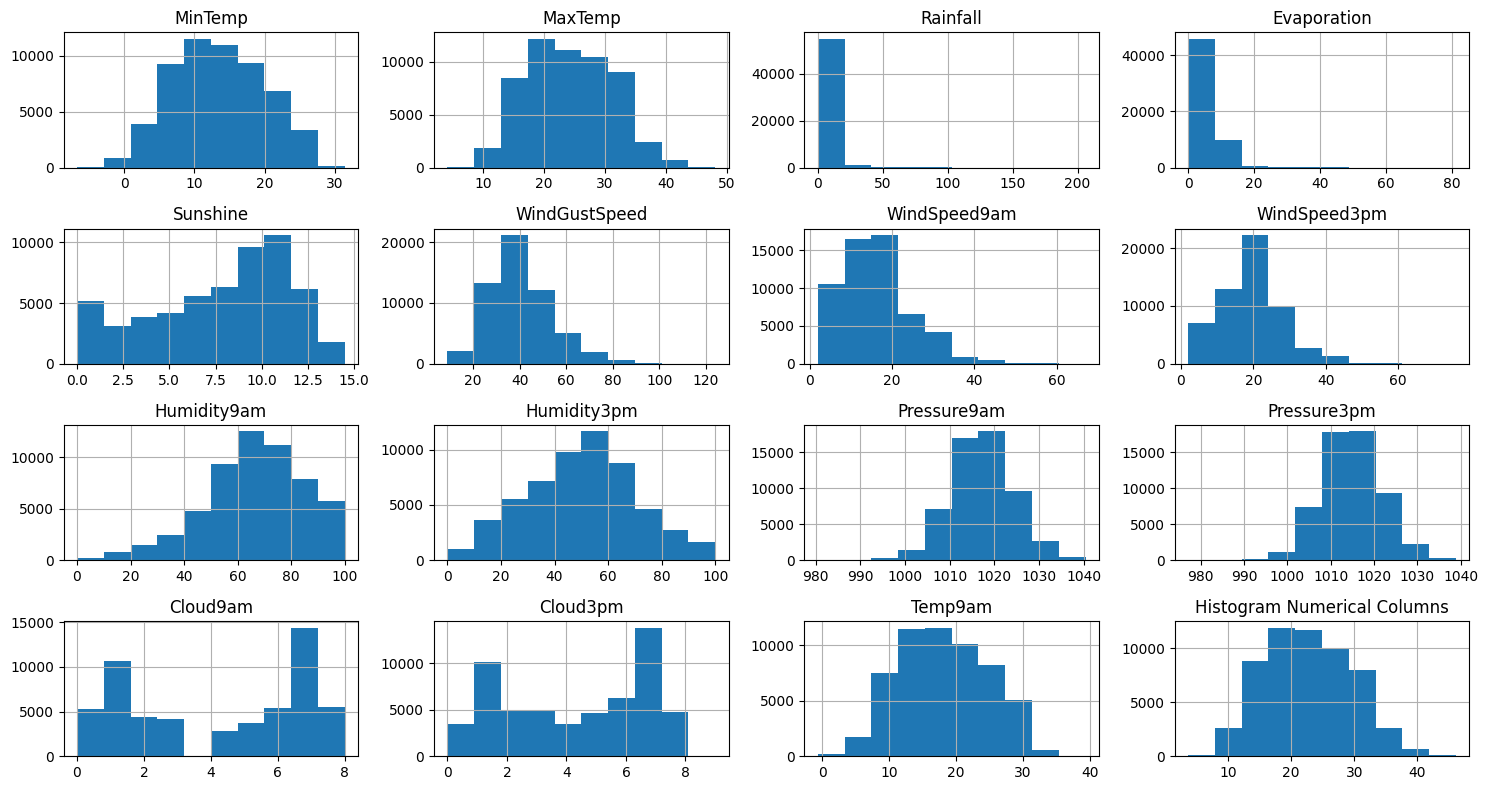

In [26]:
# menampilkan histogram dari numerical columns
df[numerical_columns].hist(figsize=(15, 8))
plt.title('Histogram Numerical Columns')
plt.tight_layout()
plt.show()

histogram digunakan memahami bagaimana data didistribusikan dan dalam visualisasi histogram di atas dapat disimpulkan bahwa untuk kolom MinTemp memiliki distribusi yang condong ke kanan, MaxTemp berdistribusi condong ke kanan, kolom rainfall berdistribusi ke kiri, evaporation berdistribusi ke kiri, sunshine berdistribusi ke kanan, WindGustSpeed berdistribusi ke kiri, WindSpeed9am berdistribusi ke kiri, windspeed3pm berdistribusi ke kiri, HUmidity9am berdistribusi ke kanan, Humidity3pm berdistribusi normal, Pressure9am berdistribusi ke kiri, Pressure3pm berdistribusi normal,Cloud9am berdistribusi ke kanan, cloud3pm berdistribusi ke kanan, Temp9am berdistribusi ke kanan, dan Numerical Columns berdistribusi normal. 

### 5.7.3 Box plot

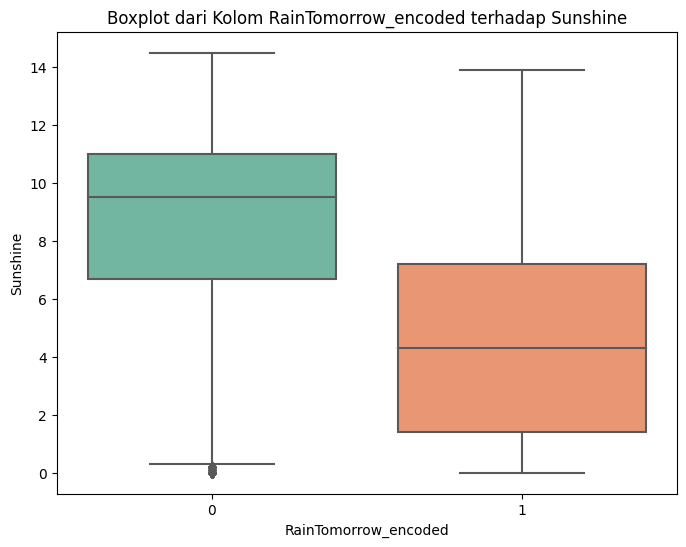

In [43]:
# Pilih kolom yang ingin divisualisasikan sebagai boxplot
kolom_boxplot = 'RainTomorrow_encoded'

# Visualisasi menggunakan Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x=kolom_boxplot, y='Sunshine', data=df, palette='Set2')
plt.title(f'Boxplot dari Kolom {kolom_boxplot} terhadap Sunshine')
plt.xlabel(kolom_boxplot)
plt.ylabel('Sunshine')
plt.show()

Box plot memberikan gambaran visual tentang sebaran dan perbedaan antara kategori raintomorrow, Boxplot dapat membantu mengidentifikasi pola atau tren dalam data. Jika box plot menunjukkan perbedaan yang signifikan antara dua kategori raintomorrow (misalnya, distribusi Sunshine yang berbeda secara signifikan), maka dapat ditarik kesimpulan bahwa variabel tersebut mungkin memiliki pengaruh pada keputusan raintomorrow.

### 5.7.4 Scatter Plot

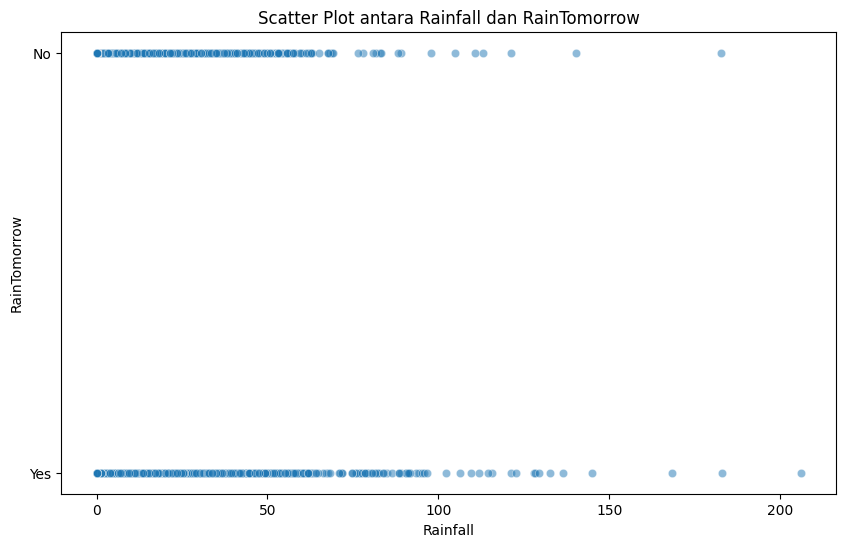


Korelasi antara Rainfall dan RainTomorrow: 0.2543416983102596


In [44]:

# Visualisasi scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rainfall', y='RainTomorrow', data=df, alpha=0.5)
plt.title('Scatter Plot antara Rainfall dan RainTomorrow')
plt.xlabel('Rainfall')
plt.ylabel('RainTomorrow')
plt.show()

# Hitung korelasi
korelasi = df['Rainfall'].corr(df['RainTomorrow_encoded'])
print(f"\nKorelasi antara Rainfall dan RainTomorrow: {korelasi}")

berdasarkan visualisasi scatterplot dimana Korelasi antara Rainfall dan RainTomorrow sebesar 0.2543416983102596 menunjukkan adanya hubungan positif yang lemah antara dua variabel tersebut. Angka korelasi berada dalam rentang -1 hingga 1, di mana nilai positif menunjukkan hubungan positif, nilai negatif menunjukkan hubungan negatif, dan nilai nol menunjukkan tidak adanya korelasi.

Dengan nilai korelasi sekitar 0.25, ini menandakan bahwa ada kecenderungan bahwa kenaikan curah hujan dapat diikuti oleh peningkatan kemungkinan RainTomorrow (cuaca hujan besok). Namun, penting untuk diingat bahwa nilai korelasi ini relatif rendah, sehingga tidak dapat dianggap sebagai indikator hubungan yang kuat antara kedua variabel tersebut.

## 6. DATA PREPROCESSING

### 6.1 Encoding Data

In [29]:
# mengganti tipe data RainToday
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Lakukan Label Encoding pada kolom RainToday
df['RainToday_encoded'] = label_encoder.fit_transform(df['RainToday'])

# Tampilkan beberapa baris setelah encoding
print("\nBeberapa baris setelah encoding:")
print(df[['RainToday', 'RainToday_encoded']].head())


Beberapa baris setelah encoding:
     RainToday  RainToday_encoded
6049        No                  0
6050        No                  0
6052        No                  0
6053        No                  0
6054        No                  0


dalam proses encoding data merupakan langkah untuk mengubah nilai data pada RainToday "no" menjadi angka 0, dan sedangakan "yes" menjadi angka 1. Untuk encoding kolom rain tomorrow ada di tahap missing value.

In [30]:
data = df[['RainTomorrow_encoded', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']]

In [31]:
data

,RainTomorrow_encoded,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
6049,0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4
6050,0,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0
6052,0,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9
6053,0,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6
6054,0,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,0,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3
142299,0,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0
142300,0,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1
142301,0,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2


Pembuatan dataframe "data" ini bertujuan untuk mempermudah melakukan langkah selanjutnya yaitu tahapan normalisasi data. Dataframe ini berisikan kolom numerik dan kolom RainTomorrow yang sudah dilakukan encoding

### 6.2 Normalisasi Data dengan RobustScaler

In [32]:
# Melakukan inisialisasi RobustScaler
scaler = RobustScaler()

# Memasangkan scaler pada data dan mengubah datanya
scaled_data = scaler.fit_transform(data)

# Mengonversi data yang sudah di skala kembali ke DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

In [33]:
scaled_df.head()

,RainTomorrow_encoded,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.0,0.479592,1.027273,0.0,1.521739,0.649123,0.529412,-0.818182,0.076923,-1.958333,-1.321429,-1.197802,-1.107527,-0.500000,0.0,0.862745,1.047619
1,0.0,0.530612,0.454545,0.0,2.130435,0.771930,-0.117647,0.363636,0.000000,-1.541667,-1.500000,-0.472527,-0.279570,-0.666667,-0.8,0.245098,0.438095
2,0.0,0.632653,1.245455,0.0,1.260870,0.350877,0.411765,1.363636,-0.307692,-1.041667,-1.000000,-0.538462,-0.591398,-0.666667,0.2,1.068627,1.190476
3,0.0,0.887755,1.318182,0.0,1.391304,0.631579,-0.470588,-0.818182,-1.000000,-1.250000,-1.000000,-0.494505,-0.602151,-0.666667,0.0,1.107843,1.257143
4,0.0,1.122449,1.554545,0.0,1.347826,-0.035088,-0.235294,0.181818,-0.461538,-2.000000,-1.250000,-0.714286,-0.784946,-0.666667,0.2,1.549020,1.447619


### 6.3 Persiapan data untuk pelatihan model dengan train_test_split()

In [34]:
X = scaled_df.drop(columns='RainTomorrow_encoded')
y = scaled_df['RainTomorrow_encoded']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## 7. PENDEFINISIAN, PELATIHAN, DAN EVALUASI MODEL

### 7.1 Logistic Regression

In [36]:
# Inisialisasi model logistic regression
model_lr = LogisticRegression()

# Latih model pada data pelatihan
model_lr.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = model_lr.predict(X_test)

# Evaluasi model dengan classification report, dan akurasi
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Accuracy Score: 0.8575682382133996


kami menggunakan LogisticRegression dengan binary logistic regression dikarenakan yang diprediksi hanya memiliki 2 kemungkinan yaitu iya/tidak-nya besok akan turun hujan, model logistik  juga dapat memprediksi target kelas dengan benar pada dataset yang digunakan. Akurasi umum adalah salah satu metrik evaluasi yang mengukur proporsi prediksi yang benar dari keseluruhan model prediksi.

Dalam konteks ini, nilai akurasi 0.8575 atau sekitar 85.75% menunjukkan bahwa model logistik berhasil memprediksi target kelas dengan benar pada sebagian besar data. Akurasi yang tinggi dapat dianggap baik, tetapi penting untuk memahami konteks spesifik dari masalah yang dihadapi. Misalnya, jika kelas target tidak seimbang (imbalance class), akurasi mungkin tidak memberikan gambaran yang akurat tentang kinerja model.

### 7.1.1 Confusion Matrix Logistic Regression

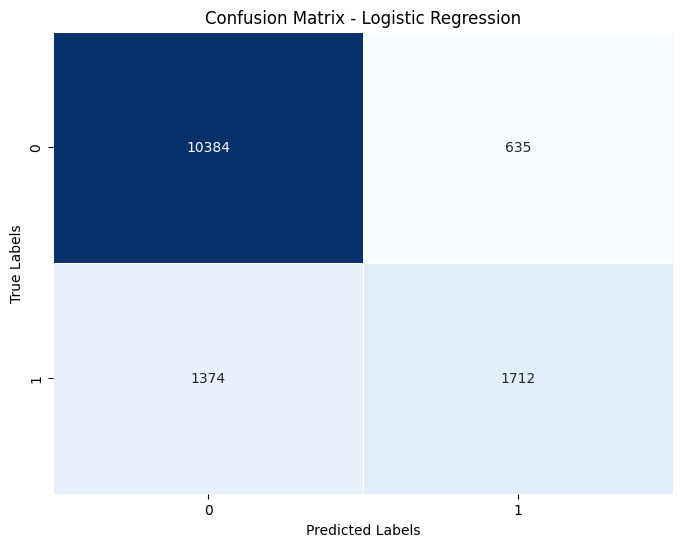

In [37]:
# Confusion matrix dari logistic regression

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### 7.1.2 Precision, Recall, F1-Score

In [38]:
y_pred = model_lr.predict(X_test)

f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("F1-Score  : ", f1)
print('Recall    : ', recall)
print('Precision : ', precision)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

F1-Score  :  0.6302227130498804
Recall    :  0.5547634478289047
Precision :  0.7294418406476353

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     11019
         1.0       0.73      0.55      0.63      3086

    accuracy                           0.86     14105
   macro avg       0.81      0.75      0.77     14105
weighted avg       0.85      0.86      0.85     14105



F1-Score (0.6302227130498804): F1-Score adalah metrik gabungan dari presisi (precision) dan recall. F1-Score memberikan gambaran tentang seberapa baik model dapat mencapai keseimbangan antara kedua metrik tersebut. Nilai F1-Score berkisar antara 0 hingga 1, di mana nilai lebih tinggi menunjukkan kinerja model yang lebih baik. Dalam kasus ini nilai F1-Score sekitar 0.63 menunjukkan bahwa model memiliki keseimbangan yang relatif baik antara presisi dan recall.

Recall (0.5547634478289047): Recall, atau disebut juga sebagai sensitivitas atau true positive rate, mengukur kemampuan model untuk mengidentifikasi semua instance positif yang sebenarnya. Dalam hal ini Nilai recall sekitar 0.55 menunjukkan bahwa model memiliki tingkat kemampuan yang cukup dalam menemukan instance positif, tetapi masih ada beberapa kasus yang terlewat.

Precision (0.7294418406476353): Precision mengukur sejauh mana model dapat mengidentifikasi instance yang diprediksi sebagai positif yang sebenarnya positif. Dalam hal ini Nilai precision sekitar 0.73 menunjukkan bahwa ketika model memberi prediksi positif, itu cenderung benar dalam sekitar 73% dari kasus tersebut.

### 7.2 SVM

In [39]:
# Inisialisasi model Support Vector Machine (SVM)
model_svm = SVC(kernel='linear', C=1.0)  # Gunakan kernel linier

# Latih model pada data pelatihan
model_svm.fit(X_train, y_train)

# Lakukan prediksi pada data pengujian
y_pred = model_svm.predict(X_test)

# Evaluasi model dengan classification report, dan akurasi
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Accuracy Score: 0.8577809287486707


 menggunakan SVM untuk mengklasifikasikan dan regresi 2 kemungkinan tersebut hingga mampu menghasilkan model klasifikasi yang baik meskipun dilatih dengan himpunan data yang relatif sedikit.Hasil Akurasi (Accuracy Score) sebesar 0.8577809287486707 menunjukkan sejauh mana model Support Vector Machine (SVM) mampu memprediksi kelas target dengan benar pada dataset yang digunakan. Dengan nilai akurasi sekitar 0.8577 atau sekitar 85.77%, ini menandakan bahwa model SVM secara keseluruhan berhasil dalam memprediksi kelas target dengan benar pada sebagian besar data.

### 7.2.1 Confusion Matrix SVM

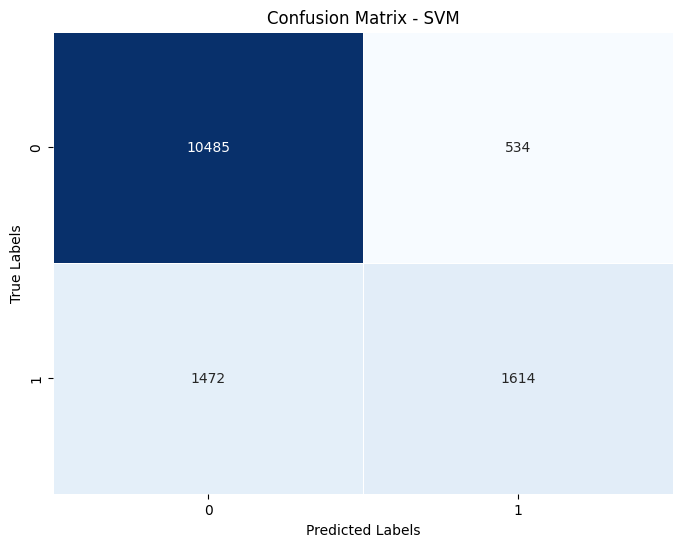

In [40]:
# Confusion matrix dari SVM

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=False)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### 7.2.2 Precision, Recall, F1-Score

In [41]:
y_pred = model_svm.predict(X_test)

f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("F1-Score  : ", f1)
print('Recall    : ', recall)
print('Precision : ', precision)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

F1-Score  :  0.6167367214367597
Recall    :  0.5230071289695398
Precision :  0.7513966480446927

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.95      0.91     11019
         1.0       0.75      0.52      0.62      3086

    accuracy                           0.86     14105
   macro avg       0.81      0.74      0.76     14105
weighted avg       0.85      0.86      0.85     14105



## 8. MODEL INFERENCE

### 8.1 Membuat dataframe dengan data baru

In [56]:
mod_inference = {
    'MinTemp' : [11.6, 9, 12.4, 10.2],
    'MaxTemp' : [23.8, 29.1, 25.1, 23.2],
    'Rainfall' : [0, 0, 11.6, 0],
    'Evaporation' : [7.6, 6.2, 12.0, 11.2],
    'Sunshine' : [11.0, 8.4, 12.3, 10.7],
    'WindGustSpeed' : [26.0, 35.0, 48.0, 37.0],
    'WindSpeed9am' : [19.0, 15.0, 6.0, 13.0],
    'WindSpeed3pm' : [11.0, 7.0, 20.0, 13.0],
    'Humidity9am' : [46.0, 19.0, 63.0, 20.0],
    'Humidity3pm' : [8.0, 28.0, 15.0, 32.0],
    'Pressure9am' : [1014.6, 1012.7, 1013.9, 1012.9],
    'Pressure3pm' : [1011.2, 1009.1, 1010.7, 1009.7],
    'Cloud9am' : [1.0, 7.0, 6.0, 2.0],
    'Cloud3pm' : [6.0, 0.0, 1.0, 5.0],
    'Temp9am' : [24.8, 33.6, 24.8, 26.6],
    'Temp3pm' : [27.0, 31.0, 32.3, 35.6]
}

mod_inference = pd.DataFrame(mod_inference)
mod_inference

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,11.6,23.8,0.0,7.6,11.0,26.0,19.0,11.0,46.0,8.0,1014.6,1011.2,1.0,6.0,24.8,27.0
1,9.0,29.1,0.0,6.2,8.4,35.0,15.0,7.0,19.0,28.0,1012.7,1009.1,7.0,0.0,33.6,31.0
2,12.4,25.1,11.6,12.0,12.3,48.0,6.0,20.0,63.0,15.0,1013.9,1010.7,6.0,1.0,24.8,32.3
3,10.2,23.2,0.0,11.2,10.7,37.0,13.0,13.0,20.0,32.0,1012.9,1009.7,2.0,5.0,26.6,35.6


### 8.2 Melakukan prediksi logistic regression

In [57]:
prediksi_lr = model_lr.predict(mod_inference)
prediksi_lr

array([0., 0., 0., 0.])

### 8.3 Melakukan Prediksi SVM

In [58]:
prediksi_svm = model_svm.predict(mod_inference)
prediksi_svm

array([0., 0., 0., 0.])

## PENGAMBILAN KESIMPULAN

Berdasarkan hasil analisis kami, dengan menggunakan model logistic regression tipe binary logistic regression dan model Support Vector Machine bahwasannya penggunaan model logistic regression lebih efektif dibandingkan SVM. karena saat menggunakan model SVM  memerlukan waktu yang cukup lama saat akan mengeksekusi kode, tahapan yang dilakukan juga lebih kompleks dibandingkan dengan logistic regresssion. Berikut adalah rangkuman dari tahapan yang telah kami lakukan:

1. Pada tahap mengatasi missing value, langkah awal kami mencari nilai yang missing di setiap kolom. Jika jumlah nilai yang missing masuk kedalam skala besar akan sukar untuk mengatasinya. Kemudian, setelah mencari nilai missing kami mengubahnya dengan nilai modus (kolom kategorikal) dan median (kolom numerikal), kami tidak menggunakan mean dikarenakan mean dapat mempengaruhi adanya outlier, jadi lebih relevan menggunakan median.

2. Pada tahapan visualisasi data dengan barplot, dimana kami menggunakan kolom RainTomorrow untuk mengetahui tingkat tingginya frekuensi kemungkinan hujan turun. Dalam 10 tahun pengamatan cuaca harian dari berbagai stasiun cuaca Australia, frekuensi kemungkinan tidak turun hujan > turun hujan.

3. Pada tahapan pelatihan dan evaluasi model, logistic regression memiliki nilai akurasi 0.8575 atau sekitar 85.75% sedangkan SVM memiliki nilai akurasi sekitar 0.8577 atau sekitar 85.77%. Tidak ada perbedaan yang terlalu signifikan sehingga kedua model dapat dikatakan bagus dalam melatih data.

Dengan menggabungkan analisis data, pemodelan machine learning, dan evaluasi model, proyek ini telah memberikan wawasan yang signifikan tentang faktor-faktor yang mempengaruhi prediksi cuaca. Kedua model, Logistic Regression dan SVM, menunjukkan kapabilitas yang baik dalam menangani tugas klasifikasi pada data cuaca ini.